In [1]:
import warnings
warnings.simplefilter('ignore')

reset()
def lines_intersection(l1, l2):
    a1 = [l1[2] - l1[0], l1[3] - l1[1]]
    a2 = [l2[2] - l2[0], l2[3] - l2[1]]
    # eq1 = a1[1]*x - a1[0]*y == a1[1]*x0 - a1[0]*y0
    # eq2 = a2[1]*x - a2[0]*y == a2[1]*x0 - a2[0]*y0
    m = [[a1[1], -a1[0], a1[1]*l1[0] - a1[0]*l1[1]],
         [a2[1], -a2[0], a2[1]*l2[0] - a2[0]*l2[1]]]
    det = m[0][0]*m[1][1] - m[0][1]*m[1][0]
    d1 = m[0][2]*m[1][1] - m[0][1]*m[1][2]
    d2 = m[0][0]*m[1][2] - m[0][2]*m[1][0]
    return [d1/det, d2/det]

def draw_line(l, size=[-5,5,-5,5]):
    var('x,y')
    a = [l[2] - l[0], l[3] - l[1]]
    return implicit_plot(a[1]*x - a[0]*y - a[1]*l[0] + a[0]*l[1], (x, size[0], size[1]), (y, size[2], size[3]))

drawing...


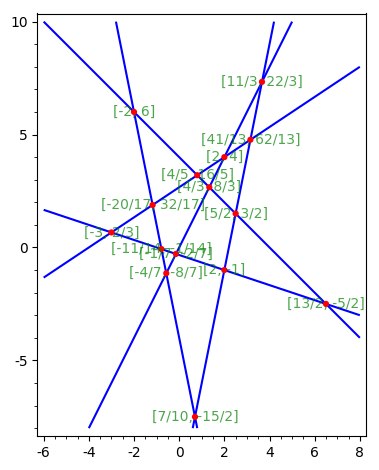

In [2]:
#
# Задача:
# На плоскости даны прямые общего положения парами точек.
# (попарно непараллельны и все точки пересечения разные => см. кол-во пересечений)
# Прямые разбивают плоскость на области, среди которых есть компактные и нет.
# Обойти по границе максимальную компактную область.
#

# Список прямых, каждая задана парами точек A(x1,y1), B(x2,y2) как [x1,y1,x2,y2]
lines_by_dots = [[0,0,1,2], [-1,0,2,-1], [2,-1,3,4], [0,4,4,0], [-4,0,2,4], [-2,6,0,-4]]
N = len(lines_by_dots)


# списки прямых с лежащими на них точками пересечений
# lines_by_intersects = [L1, L2, ...]
#                  L1 = [p1, p2, ...]
#                  p1 = [[x1,y1], cur_line, next_line, next_num]
lines_by_intersects = [[] for i in range(N)]

# список точек пересечения прямых формата [x1,y1]
intersects_by_dots = []

for i in range(N):
    for j in range(i+1, N):
        x = lines_intersection(lines_by_dots[i], lines_by_dots[j])
        intersects_by_dots.append(x)
        
        # добавляем точку пересечения в lines_by_intersects сразу с сортировкой
        num = len(lines_by_intersects[i])
        for k in range(len(lines_by_intersects[i])):
            if x[0] <= lines_by_intersects[i][k][0][0]:
                num = k
                break
        lines_by_intersects[i].insert(num,[x,i,j])
        
        num = len(lines_by_intersects[j])
        for k in range(len(lines_by_intersects[j])):
            if x[0] <= lines_by_intersects[j][k][0][0]:
                num = k
                break
        lines_by_intersects[j].insert(num,[x,j,i])

# добавление next_num для p1 = [[x1,y1], cur_line, next_line, next_num]
for i in range(N):
    for j in range(N-1):
        cur = lines_by_intersects[i][j]
        for k in range(N-1):
            if lines_by_intersects[cur[2]][k][0] == cur[0]:
                lines_by_intersects[i][j].append(k)
                break


print('drawing...')
p = plot([])
plot_size = [-6,8,-8,10]
for i in lines_by_dots:
    p += draw_line(i, plot_size)
for i in intersects_by_dots:
    p += point(i, color='red', size=20, zorder=2)
    p += text(i, [i[0], i[1]], color='green', alpha=0.7, zorder=2)
p.show()

In [3]:
for i in lines_by_intersects:
    for j in i:
        print(j)
    print('')

[[-4/7, -8/7], 0, 5, 3]
[[-1/7, -2/7], 0, 1, 2]
[[4/3, 8/3], 0, 3, 2]
[[2, 4], 0, 4, 3]
[[11/3, 22/3], 0, 2, 4]

[[-3, 2/3], 1, 4, 0]
[[-11/14, -1/14], 1, 5, 2]
[[-1/7, -2/7], 1, 0, 1]
[[2, -1], 1, 2, 1]
[[13/2, -5/2], 1, 3, 4]

[[7/10, -15/2], 2, 5, 4]
[[2, -1], 2, 1, 3]
[[5/2, 3/2], 2, 3, 3]
[[41/13, 62/13], 2, 4, 4]
[[11/3, 22/3], 2, 0, 4]

[[-2, 6], 3, 5, 0]
[[4/5, 16/5], 3, 4, 2]
[[4/3, 8/3], 3, 0, 2]
[[5/2, 3/2], 3, 2, 2]
[[13/2, -5/2], 3, 1, 4]

[[-3, 2/3], 4, 1, 0]
[[-20/17, 32/17], 4, 5, 1]
[[4/5, 16/5], 4, 3, 1]
[[2, 4], 4, 0, 3]
[[41/13, 62/13], 4, 2, 3]

[[-2, 6], 5, 3, 0]
[[-20/17, 32/17], 5, 4, 1]
[[-11/14, -1/14], 5, 1, 1]
[[-4/7, -8/7], 5, 0, 0]
[[7/10, -15/2], 5, 2, 0]



In [4]:
# выдает ориентацию векторов prev-cur и next-cur
def get_orientation(prev, cur, next):
    return sign((prev[0][0]-cur[0][0])*(next[0][1]-cur[0][1]) - 
                (next[0][0]-cur[0][0])*(prev[0][1]-cur[0][1]))

prev_point = None
cur_line_num = None
cur_point_num = None
cur_point = None
next_point = None
first = None

# для начала найдем крайнюю точку на двух прямых
for i in range(N):
    if lines_by_intersects[i][0][3] == 0 or lines_by_intersects[i][0][3] == N-2:
        cur_line_num = i
        cur_point_num = 0
        cur_point = lines_by_intersects[cur_line_num][cur_point_num]
        break
    elif lines_by_intersects[i][N-2][3] == 0 or lines_by_intersects[i][N-2][3] == N-2:
        cur_line_num = i
        cur_point_num = N-2
        cur_point = lines_by_intersects[cur_line_num][cur_point_num]
        break

if cur_point_num < N-2:
    prev_point = lines_by_intersects[cur_line_num][cur_point_num + 1]
elif cur_point_num > 1:
    prev_point = lines_by_intersects[cur_line_num][cur_point_num - 1]

if cur_point[3] < N-2:
    next_point = lines_by_intersects[cur_point[2]][cur_point[3] + 1]
elif cur_point[3] > 1:
    next_point = lines_by_intersects[cur_point[2]][cur_point[3] - 1]

first = cur_point[0]
orient = -get_orientation(prev_point, cur_point, next_point)
outer_cycle = [first]

while not next_point[0] == first:
    # следующая НЕ крайняя - поворачиваем
    if 0 < next_point[3] < N-2:
        cur_line_num = next_point[1]
        cur_point_num = lines_by_intersects[next_point[2]][next_point[3]][3]
        prev_point = cur_point
        cur_point = next_point
        outer_cycle.append(cur_point[0])

        if get_orientation(prev_point, cur_point,
                           lines_by_intersects[cur_point[2]][cur_point[3] + 1]) == orient:
            next_point = lines_by_intersects[cur_point[2]][cur_point[3] + 1]
        else:
            next_point = lines_by_intersects[cur_point[2]][cur_point[3] - 1]
    # следующая крайняя
    else:
        cur_line_num = next_point[1]
        cur_point_num = lines_by_intersects[next_point[2]][next_point[3]][3]
        prev_point = cur_point
        cur_point = next_point
        outer_cycle.append(cur_point[0])

        # проходим мимо крайней, которая не последняя на текущей прямой:
        if 0 < cur_point_num < N-2:
            if lines_by_intersects[cur_line_num][cur_point_num + 1][0] == prev_point[0]:
                next_point = lines_by_intersects[cur_line_num][cur_point_num - 1]
            else:
                next_point = lines_by_intersects[cur_line_num][cur_point_num + 1]
        # сворачиваем по единственному варианту:
        else:
            if cur_point[3] < N-2:
                next_point = lines_by_intersects[cur_point[2]][cur_point[3] + 1]
            elif cur_point[3] > 1:
                next_point = lines_by_intersects[cur_point[2]][cur_point[3] - 1]

print(outer_cycle)

[[11/3, 22/3], [41/13, 62/13], [5/2, 3/2], [13/2, -5/2], [2, -1], [7/10, -15/2], [-4/7, -8/7], [-11/14, -1/14], [-3, 2/3], [-20/17, 32/17], [-2, 6], [4/5, 16/5], [2, 4]]


drawing outer cycle...


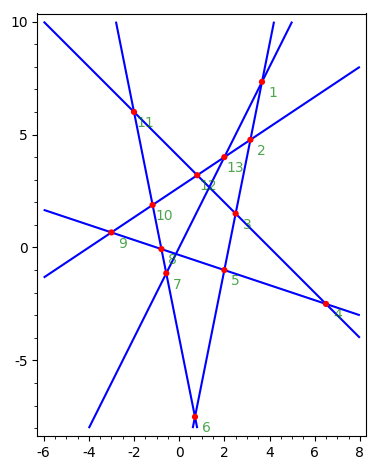

In [5]:
print('drawing outer cycle...')
p = plot([])
#plot_size = [-6,8,-5,10]
for i in lines_by_dots:
    p += draw_line(i, plot_size)
count = 0
for i in outer_cycle:
    count += 1
    p += point(i, color='red', size=20, zorder=2)
    p += text(count, [i[0]+0.5, i[1]-0.5], color='green', alpha=0.7, zorder=2)
p.show()